[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Clone repo and install dependencies

In [1]:
! if cd document-scanner-opencv-ws; then git pull; else git clone https://github.com/jiahuei/document-scanner-opencv-ws; fi
% cd document-scanner-opencv-ws

/bin/bash: line 0: cd: document-scanner-opencv-ws: No such file or directory
Cloning into 'document-scanner-opencv-ws'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 88 (delta 32), reused 72 (delta 22), pack-reused 0
Unpacking objects: 100% (88/88), done.
/content/document-scanner-opencv-ws


Remove `Pillow`, `matplotlib` and `numpy` from `requirements.txt`, since installing them require runtime restart.

In [2]:
! sed -i '/^Pillow/d' requirements.txt
! sed -i '/^matplotlib/d' requirements.txt
! sed -i '/^numpy/d' requirements.txt
! pip install -r requirements.txt

     |████████████████████████████████| 17.7MB 215kB/s 
     |████████████████████████████████| 56.4MB 76kB/s 
     |████████████████████████████████| 50.4MB 66kB/s 
     |████████████████████████████████| 10.1MB 48.2MB/s 
     |████████████████████████████████| 286kB 38.2MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 27.4MB 160kB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 399kB 53.5MB/s 
     |████████████████████████████████| 225kB 38.6MB/s 
     |████████████████████████████████| 624kB 36.9MB/s 
     |████████████████████████████████| 184kB 44.7MB/s 
     |████████████████████████████████| 61kB 4.0MB/s 
     |███

# Demo

In [3]:
import os
from matplotlib import pyplot as plt
from IPython.display import Image
from scanner.detect_doc import A4Detector, visualise_detection
from scanner.utils.image import read_image

In [4]:
def plt_imshow(img, **kwargs):
    if img.ndim == 3:
        # opencv loads image as BGR
        img = img[..., ::-1]
    plt.imshow(img, **kwargs)

## Create the detector instance

In [5]:
doc_detector = A4Detector(
    use_image_features=bool(os.getenv("DET_SIFT_FEATURE", False)),
    doc_extract_width=int(os.getenv("DOC_EXTRACT_WIDTH", 1414)),
    doc_extract_height=int(os.getenv("DOC_EXTRACT_HEIGHT", 2000)),
)

## Read the test image


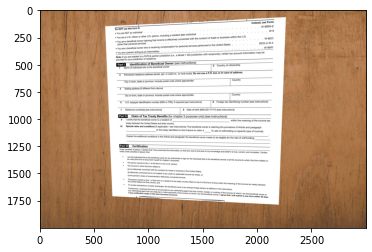

In [6]:
image = read_image(os.path.join("tests", "data", "test_w8_ben.jpg"))
plt_imshow(image)

In [7]:
res = doc_detector(image)

## Image after Otsu thresholding

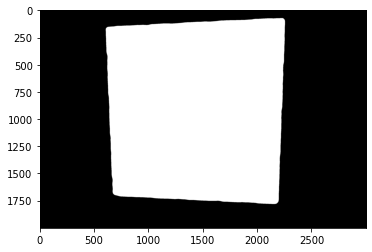

In [8]:
plt_imshow(res["debug"]["doc_vis"], cmap="gray")

## Output

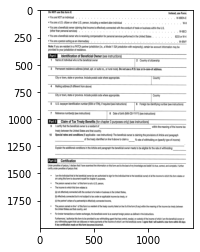

In [9]:
plt_imshow(res["doc"], cmap="gray")

## Corner points of the document

In [10]:
res["doc_points"]

[[607.0, 165.0], [2233.0, 77.0], [2183.0, 1763.0], [677.0, 1691.0]]